Lab 1: Analisis del Data Set Loneliness and Social Connections 

1. (5%) Descargue la siguiente base de datos en su carpeta de trabajo:
hWps://www.kaggle.com/datasets/arashnic/loneliness-and-social-connections. En Kaggle. Utilice la biblioteca Pandas para cargar la base de datos “oneperson-households-vs-gdp-per-capita.csv” en un data frame. Realice los imports
necesarios.

In [15]:
import pandas as pd

file_path = r'archive\one-person-households-vs-gdp-per-capita.csv'

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv(file_path)

# Ver las primeras filas del DataFrame para confirmar que se cargó correctamente
print(df.head())


        Entity      Code  Year  Total population (Gapminder, HYDE & UN)  \
0     Abkhazia  OWID_ABK  2015                                      NaN   
1  Afghanistan       AFG  1800                                3280000.0   
2  Afghanistan       AFG  1801                                3280000.0   
3  Afghanistan       AFG  1802                                3280000.0   
4  Afghanistan       AFG  1803                                3280000.0   

  Continent  GDP per capita, PPP (constant 2011 international $)  \
0      Asia                                                NaN     
1       NaN                                                NaN     
2       NaN                                                NaN     
3       NaN                                                NaN     
4       NaN                                                NaN     

   Share of one person households  
0                             NaN  
1                             NaN  
2                             Na

2. (10%) Explique en un comentario al inicio de su notebook qué consiste esta base de
datos, detallando las variables que tiene y 3 preguntas que se podrían investigar con esta
base de datos.




Esta base de datos recopila datos específicos de varias entidades (países, continentes y el mundo entero) en diferentes años. Las variables que contiene son: entidad, código (de la entidad), año, población total, continente, PIB per cápita y porcentaje de hogares con una sola persona.

Con base en estos datos se podrían investigar algunas preguntas tales como:

- ¿De qué manera se relaciona el PIB per cápita con el porcentaje de hogares?
- ¿Ha aumentado el porcentaje de hogares con una sola persona a lo largo del tiempo? ¿Cuáles serían las posibles causas?
- ¿Cómo afecta el crecimiento de la población al PIB per cápita?


3. (5%) Imprima 3 filas de este data frame (por ejemplo, la posiciones 4, 19 y 95 de la base
de datos)

In [16]:
# Imprimir las filas en las posiciones 4, 19 y 95
rows_to_print = [4, 19, 95]
selected_rows = df.iloc[rows_to_print]

# Mostrar las filas seleccionadas
print(selected_rows)

         Entity Code  Year  Total population (Gapminder, HYDE & UN) Continent  \
4   Afghanistan  AFG  1803                                3280000.0       NaN   
19  Afghanistan  AFG  1818                                3308390.0       NaN   
95  Afghanistan  AFG  1894                                4832253.0       NaN   

    GDP per capita, PPP (constant 2011 international $)  \
4                                                 NaN     
19                                                NaN     
95                                                NaN     

    Share of one person households  
4                              NaN  
19                             NaN  
95                             NaN  


In [17]:
# Imprimir todas las columnas
column_names = df.columns
print("Nombres de las columnas:")
print(column_names)

Nombres de las columnas:
Index(['Entity', 'Code', 'Year', 'Total population (Gapminder, HYDE & UN)',
       'Continent', 'GDP per capita, PPP (constant 2011 international $)',
       'Share of one person households'],
      dtype='object')


5. a. (5%) Modifique el nombre de las columnas correspondientes al GDP por persona y la
proporción de hogares con una sola persona. Coloque los siguientes nombres: "GDP per
capita" y “Share 1p household”. Imprima para verificar que las columnas fueron
modificadas satisfactoriamente.

In [18]:
# Mostrar los nombres de las columnas actuales
print("Nombres originales de las columnas:")
print(df.columns)

# Cambiar los nombres de las columnas específicas
df.rename(columns={
    'GDP per capita, PPP (constant 2011 international $)': 'GDP per capita',
    'Share of one person households': 'Share 1p household'
}, inplace=True)

# Verificar que los nombres se cambiaron correctamente
print("\nNombres de las columnas después de la modificación:")
print(df.columns)

Nombres originales de las columnas:
Index(['Entity', 'Code', 'Year', 'Total population (Gapminder, HYDE & UN)',
       'Continent', 'GDP per capita, PPP (constant 2011 international $)',
       'Share of one person households'],
      dtype='object')

Nombres de las columnas después de la modificación:
Index(['Entity', 'Code', 'Year', 'Total population (Gapminder, HYDE & UN)',
       'Continent', 'GDP per capita', 'Share 1p household'],
      dtype='object')


b. (5%) Imprima el número de filas y columnas de la base de datos e imprima una muestra
de la base de datos usando el comando head(100).

In [19]:
# Obtener el número de filas y columnas
num_filas, num_columnas = df.shape
print(f"Número de filas: {num_filas}")
print(f"Número de columnas: {num_columnas}")

# Imprimir una muestra de las primeras 100 filas de la base de datos
print("\nMuestra de las primeras 100 filas de la base de datos:")
print(df.head(100))

Número de filas: 48175
Número de columnas: 7

Muestra de las primeras 100 filas de la base de datos:
         Entity      Code  Year  Total population (Gapminder, HYDE & UN)  \
0      Abkhazia  OWID_ABK  2015                                      NaN   
1   Afghanistan       AFG  1800                                3280000.0   
2   Afghanistan       AFG  1801                                3280000.0   
3   Afghanistan       AFG  1802                                3280000.0   
4   Afghanistan       AFG  1803                                3280000.0   
..          ...       ...   ...                                      ...   
95  Afghanistan       AFG  1894                                4832253.0   
96  Afghanistan       AFG  1895                                4863258.0   
97  Afghanistan       AFG  1896                                4894458.0   
98  Afghanistan       AFG  1897                                4925855.0   
99  Afghanistan       AFG  1898                                

6. (10%) Seleccione los datos que correspondan a años más recientes que 2015. Además,
seleccione los datos que únicamente tengan datos no nulos en las columnas "GDP per
capita" y “Share 1p household”. Imprima una muestra de la base de datos. 

In [20]:
# Filtrar los datos para años más recientes que 2015
df_filtered = df[df['Year'] > 2015]

# Seleccionar filas que no tengan valores nulos en "GDP per capita" y "Share 1p household"
df_filtered = df_filtered.dropna(subset=['GDP per capita', 'Share 1p household'])

# Imprimir una muestra de los datos filtrados
print("\nMuestra de los datos filtrados:")
print(df_filtered.head(100))


Muestra de los datos filtrados:
               Entity Code  Year  Total population (Gapminder, HYDE & UN)  \
1290           Angola  AGO  2016                               28842000.0   
2461        Australia  AUS  2016                               24263000.0   
2681          Austria  AUT  2016                                8747000.0   
2682          Austria  AUT  2017                                8820000.0   
4224          Belgium  BEL  2016                               11354000.0   
...               ...  ...   ...                                      ...   
44913          Uganda  UGA  2016                               39649000.0   
45573  United Kingdom  GBR  2016                               66298000.0   
45574  United Kingdom  GBR  2017                               66727000.0   
45794   United States  USA  2016                              323016000.0   
45795   United States  USA  2017                              325084992.0   

      Continent  GDP per capita  Share 1p 

7. (15%) Se tienen algunos países que aparecen varias veces en la muestra, con los años en
desorden (a veces sale primero el año menor y a veces el año mayor). Para los países que
aparecen varias veces, elimine las filas repetidas, correspondientes a los años más viejos.
Por ejemplo, si Suecia aparece con 2016 y 2015, procure eliminar el 2015. Imprima una
muestra de la base de datos y la can5dad de filas. Debería tener 43 filas.

In [21]:
# Ordenar el DataFrame por país ('Entity') y año ('Year') en orden descendente
df_filtered_sorted = df_filtered.sort_values(by=['Entity', 'Year'], ascending=[True, False])

# Eliminar duplicados, manteniendo solo la fila más reciente para cada país
df_unique = df_filtered_sorted.drop_duplicates(subset=['Entity'], keep='first')

# Imprimir la cantidad de filas y una muestra del DataFrame resultante
num_filas = len(df_unique)
print(f"\nCantidad de filas después de eliminar duplicados: {num_filas}")
print("\nMuestra de la base de datos final:")
print(df_unique.head(100))  # Se espera que sean 43 filas en total, pero mostramos solo una muestra


Cantidad de filas después de eliminar duplicados: 43

Muestra de la base de datos final:
                Entity Code  Year  Total population (Gapminder, HYDE & UN)  \
1290            Angola  AGO  2016                               28842000.0   
2461         Australia  AUS  2016                               24263000.0   
2682           Austria  AUT  2017                                8820000.0   
4225           Belgium  BEL  2017                               11420000.0   
6417          Bulgaria  BGR  2017                                7102000.0   
6856           Burundi  BDI  2016                               10488000.0   
10205          Croatia  HRV  2017                                4183000.0   
10715           Cyprus  CYP  2017                                1180000.0   
10935          Czechia  CZE  2017                               10641000.0   
11376          Denmark  DNK  2017                                5732000.0   
13471          Estonia  EST  2017                   

8. (10%) Obtenga la media y desviación estándar de la variable “Total population” para los
datos más recientes. Asegúrese que solo está incluyendo los años más recientes. 

In [22]:
latest_year = df['Year'].max()
filtered_df = df[df['Year'] == latest_year]

# Calcula la media y desviación estándar de 'Total population'
mean_population = filtered_df['Total population (Gapminder, HYDE & UN)'].mean()
std_population = filtered_df['Total population (Gapminder, HYDE & UN)'].std()

print(f"Media de 'Total population' para los datos más recientes: {mean_population}")
print(f"Desviación estándar de 'Total population' para los datos más recientes: {std_population}")

Media de 'Total population' para los datos más recientes: 95621516.99173553
Desviación estándar de 'Total population' para los datos más recientes: 596494099.2823241


9. (5%) Grafique los datos correspondientes a “Share 1p household” y "GDP per capita",
como ejes x y y, respectivamente. Para ello, procure ordenar la base de datos con valores
de menor a mayor respecto a la variable “Share 1p household”. Añada etiquetas para los
ejes y un titulo significativo. 


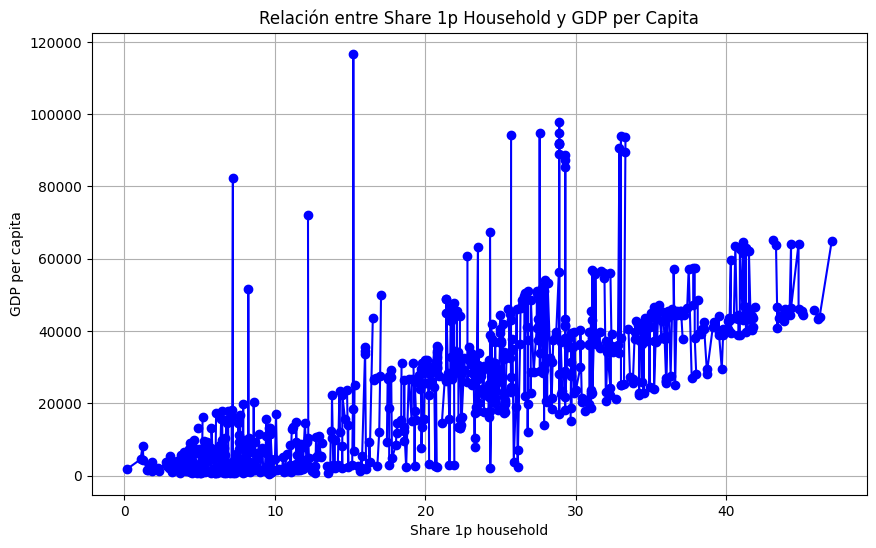

In [23]:
import matplotlib.pyplot as plt

# Ordena el DataFrame por 'Share 1p household'
df_sorted = df.sort_values(by='Share 1p household')

# Crea la gráfica
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['Share 1p household'], df_sorted['GDP per capita'], marker='o', linestyle='-', color='b')
plt.xlabel('Share 1p household')
plt.ylabel('GDP per capita')
plt.title('Relación entre Share 1p Household y GDP per Capita')
plt.grid(True)
plt.show()

10. (10%) Calcule e imprima el índice de correlación entre las variables “Share 1p
household” y "GDP per capita" utilizando las bibliotecas más relevantes. Responda como
comentario en el notebook si cree que es una correlación fuerte (investigue para
interpretar los números). ¿Cómo interpretaría usted este valor?

In [24]:
# Calcula el índice de correlación entre 'Share 1p household' y 'GDP per capita'
correlation = df['Share 1p household'].corr(df['GDP per capita'])

# Imprime el valor de correlación
print(f"Índice de correlación entre 'Share 1p household' y 'GDP per capita': {correlation}")

Índice de correlación entre 'Share 1p household' y 'GDP per capita': 0.747979714848469


**Índice de Correlación:**

El índice de correlación entre "Share 1p household" y "GDP per capita" es de 0.7479797148484691.

**Interpretación:**

Un valor cercano a 1 o -1 indica una correlación fuerte entre las dos variables. Por ejemplo, un índice de correlación de 0.8 sugiere una correlación fuerte y positiva, lo que significa que a medida que "Share 1p household" aumenta, también tiende a aumentar el "GDP per capita", y viceversa.

En cambio, un valor cercano a 0 sugiere una relación débil o nula entre las variables. La interpretación específica depende del valor obtenido, y puede revelar la intensidad y dirección de la relación entre las dos variables en el contexto de nuestro análisis.

Es importante tener en cuenta que la correlación no implica causalidad, por lo que una correlación alta no necesariamente indica que una variable afecte la otra.


11. a. (10%) Hay algunos países que se comportan de manera excepcional. Para mejorar el
análisis de datos, a veces es importante eliminar los casos excepcionales (outliers). Elimine
los países que tengan un GDP per cápita mayor a $70,000 anuales y vuelva a graficar.
¿Aprecia las diferencias en la gráfica?

In [25]:
# Filtra los datos para eliminar los países con GDP per capita mayor a $70,000
df_filtered = df[df['GDP per capita'] <= 70000]

# Ordena el DataFrame por 'Share 1p household'
df_sorted_filtered = df_filtered.sort_values(by='Share 1p household')

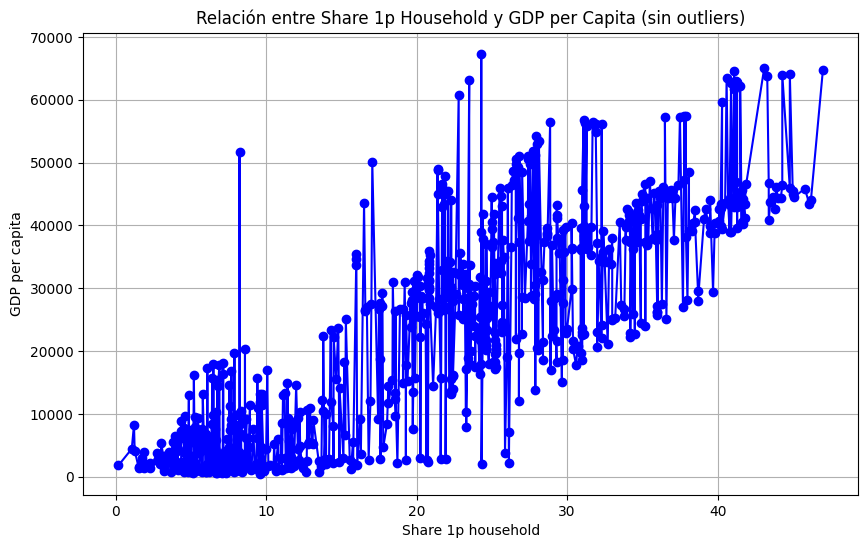

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(df_sorted_filtered['Share 1p household'], df_sorted_filtered['GDP per capita'], marker='o', linestyle='-', color='b')
plt.xlabel('Share 1p household')
plt.ylabel('GDP per capita')
plt.title('Relación entre Share 1p Household y GDP per Capita (sin outliers)')
plt.grid(True)
plt.show()


**Análisis de Datos con Outliers Eliminados:**

Después de eliminar los países con un `GDP per capita` mayor a $70,000, hemos graficado los datos restantes.

**Observaciones:**

Al eliminar los outliers, la gráfica puede mostrar una tendencia más clara o diferente en la relación entre "Share 1p household" y "GDP per capita". La eliminación de estos valores extremos puede ayudar a identificar patrones subyacentes que podrían haber sido distorsionados por los casos excepcionales.
La relación entre las dos variables se vuelve más evidente conforme aumenta el `Share 1p household`.



b. (5%) Vuelva a calcular la correlación entre las variables. Responda: ¿qué ocurrió con la
correlación?

In [27]:
# Calcula el índice de correlación entre 'Share 1p household' y 'GDP per capita' para los datos filtrados
correlation_filtered = df_filtered['Share 1p household'].corr(df_filtered['GDP per capita'])

# Imprime el valor de correlación
print(f"Índice de correlación entre 'Share 1p household' y 'GDP per capita' (sin outliers): {correlation_filtered}")

Índice de correlación entre 'Share 1p household' y 'GDP per capita' (sin outliers): 0.8336910548726563


**Índice de Correlación después de Eliminar Outliers:**

Después de eliminar los países con un `GDP per capita` mayor a $70,000, el índice de correlación entre "Share 1p household" y "GDP per capita" es de 0.8336910548726567.

**Observaciones:**

La comparación del índice de correlación antes y después de eliminar los outliers revela lo siguiente:
La correlación aumentó, esto sugiere que los outliers estaban afectando la relación entre las variables y su eliminación ha permitido observar una correlación más fuerte.

